<a href="https://colab.research.google.com/github/RUSHIMore07/rk07/blob/master/Copy_of_CNN_Dog%26Cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:46<00:00, 25.1MB/s]
100% 1.06G/1.06G [00:46<00:00, 24.5MB/s]


In [ ]:
import zipfile
zip = zipfile.ZipFile("/content/dogs-vs-cats.zip",'r')
zip.extractall('/content')
zip.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization
import matplotlib.pyplot as plt


In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory="/content/train",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.


In [ ]:
test_ds = keras.utils.image_dataset_from_directory(
    directory="/content/test",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256,256)
)

Found 5000 files belonging to 2 classes.


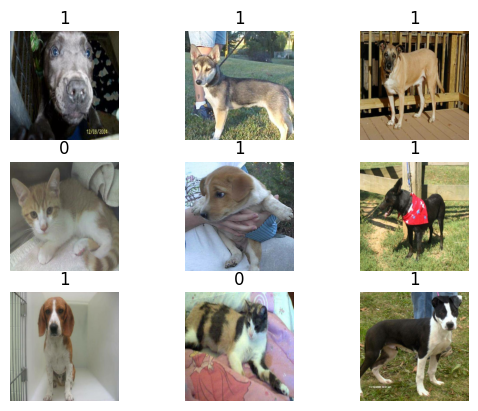

In [ ]:
for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy()/255.0)
        plt.title(str(labels[i].numpy()))
        plt.axis("off")

In [ ]:
def process(image, label):
    image = tf.cast(image/255, tf.float32)
    return image, label

train_ds = train_ds.map(process)
test_ds = test_ds.map(process)

In [ ]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3), padding="valid", activation="relu", input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2,padding="valid"))

model.add(Conv2D(64,kernel_size=(3,3), padding="valid", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2,padding="valid"))

model.add(Conv2D(128,kernel_size=(3,3), padding="valid", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2,padding="valid"))

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(1, activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [ ]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
model.fit(train_ds, epochs=6, validation_data=test_ds)

Epoch 1/6
625/625 [==============================] - 69s 105ms/step - loss: 1.2699 - accuracy: 0.5781 - val_loss: 0.6167 - val_accuracy: 0.6330


In [ ]:
import cv2

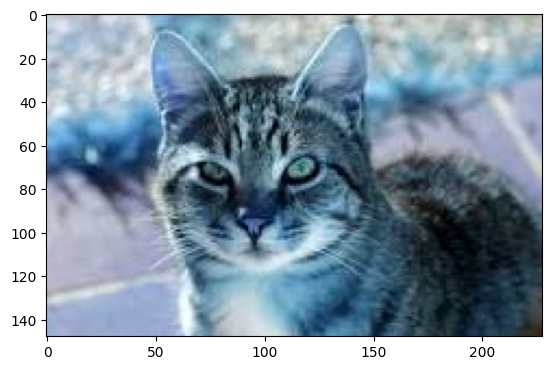

In [ ]:
test_img=cv2.imread('/content/cat.jpeg')
plt.imshow(test_img)

In [ ]:
test_img.shape

(148, 228, 3)

In [ ]:
test_img=cv2.resize(test_img,(256,256))

In [ ]:
test= test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test)

1/1 [==============================] - 0s 17ms/step


array([[0.]], dtype=float32)